In [1]:
# in this dataset we have a list of top 100  imdb movie 

In [2]:
# Importing the required librarie for this dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
#first we will read the csv file by using read csv 
movie=pd.read_csv('dataset/Movie+Assignment+Data.csv')
movie.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


In [4]:
#now i am going to look how much rows nd columns we hvae in this data set
movie.shape

(100, 62)

In [5]:
#now we will check that is there any misssing values in our dataset
movie.isnull().sum().sum()

37

In [6]:
#Check the column-wise info of the dataframe
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

<AxesSubplot:xlabel='title_year', ylabel='count'>

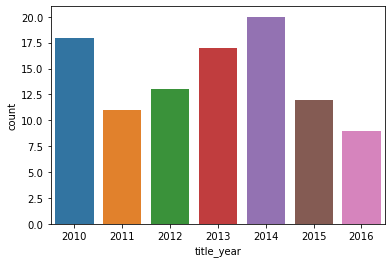

In [7]:
#now we will see in which year most number of movie has been realised
sns.countplot(x='title_year',data=movie)
#now we can clearly see that most number of movie has been realised in 2014 

In [8]:
#now we will check that is there any misssing values in our dataset
movie.isnull().sum().sum()
#we can clearly see that there is no missing values in our dataset

37

In [9]:
# now i am going to check all the discription about all columns 
movie.describe()

,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,...,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,...,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,...,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,...,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,...,8.000000,7.700000,7.700000,7.800000,7.65000,7.600000,7.800000,7.300000,7.950000,7.750000
75%,2014.000000,1.500000e+08,2.107548e+08,20000.000000,11000.000000,1000.000000,8.100000,83.500000,136.250000,80639.000000,...,8.200000,7.900000,7.900000,8.000000,7.80000,7.800000,7.925000,7.500000,8.100000,7.925000
max,2016.000000,2.600000e+08,9.366622e+08,35000.000000,96000.000000,46000.000000,8.800000,100.000000,180.000000,584839.000000,...,8.800000,8.700000,8.700000,8.500000,8.10000,8.100000,8.500000,8.200000,8.700000,8.800000


In [10]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'
movie['budget']=movie['budget']/1000000
movie['Gross']=movie['Gross']/1000000
movie.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


In [11]:
# creating a new columns called profit 
movie["Profit"]= movie['Gross']-movie['budget'] 
movie.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA,121.101803
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268248
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia,39.738905
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53.546139
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA,38.695371


In [12]:
#now i want top 10 profitable movie list
movies=movie.sort_values(by='Profit',ascending=False)
df1=movies.head(10)
df1

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
11,The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497
8,The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.130642
45,The Lego Movie,2014,60.0,257.756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,...,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756197
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268248
41,Despicable Me,2010,69.0,251.501645,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000.0,975.0,...,7.9,7.6,7.5,7.9,7.0,7.6,7.6,PG,USA,182.501645
18,Inside Out,2015,175.0,356.454367,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,8.1,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181.454367


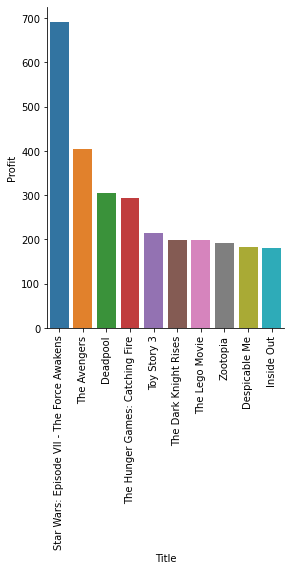

In [13]:
#now we will see the to 10 movies which have earn more profit
ax=sns.catplot(x='Title',y='Profit',kind='bar',data=df1)
ax.set_xticklabels(rotation=90)
#by this graph we can clearly see which movie has earn more profit


In [14]:
#now we want to see those movie which have gain -ve rofit on box office
df2=movie[movie['Profit']<0]
df3=df2.sort_values(by='Profit',ascending=True)
df3



,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit
22,Hugo,2011,170.0,73.820094,ChloÃ« Grace Moretz,Christopher Lee,Ray Winstone,17000,16000.0,1000.0,...,7.4,7.5,7.5,7.6,7.4,7.7,7.5,PG,USA,-96.179906
39,The Little Prince,2015,81.2,1.339152,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.9,7.5,7.4,7.9,6.6,7.7,7.7,PG,France,-79.860848
17,Edge of Tomorrow,2014,178.0,100.189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.7,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-77.810499
7,Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59.192738
46,Scott Pilgrim vs. the World,2010,60.0,31.494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,...,7.2,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-28.505730
28,X-Men: First Class,2011,160.0,146.405371,Jennifer Lawrence,Michael Fassbender,Oliver Platt,34000,13000.0,1000.0,...,7.8,7.6,7.5,7.7,7.3,7.8,7.7,PG-13,USA,-13.594629
82,Flipped,2010,14.0,1.752214,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.0,767.0,...,7.7,7.4,7.3,7.6,6.4,7.5,7.7,PG,USA,-12.247786
66,Warrior,2011,25.0,13.651662,Tom Hardy,Frank Grillo,Kevin Dunn,27000,798.0,581.0,...,8.0,7.7,7.7,7.5,7.1,8.2,8.1,PG-13,USA,-11.348338
56,Rush,2013,38.0,26.903709,Chris Hemsworth,Olivia Wilde,Alexandra Maria Lara,26000,10000.0,471.0,...,7.9,7.8,7.8,7.8,7.1,7.9,8.1,R,UK,-11.096291
89,Amour,2012,8.9,0.225377,Isabelle Huppert,Emmanuelle Riva,Jean-Louis Trintignant,678,432.0,319.0,...,7.9,7.9,7.8,8.1,7.2,7.9,7.8,PG-13,France,-8.674623


In [15]:
#here is the list of all those movie which have earn -ve profit on boxoffice
df3.iloc[:,[0,62]]

,Title,Profit
22,Hugo,-96.179906
39,The Little Prince,-79.860848
17,Edge of Tomorrow,-77.810499
7,Tangled,-59.192738
46,Scott Pilgrim vs. the World,-28.505730
28,X-Men: First Class,-13.594629
82,Flipped,-12.247786
66,Warrior,-11.348338
56,Rush,-11.096291
89,Amour,-8.674623


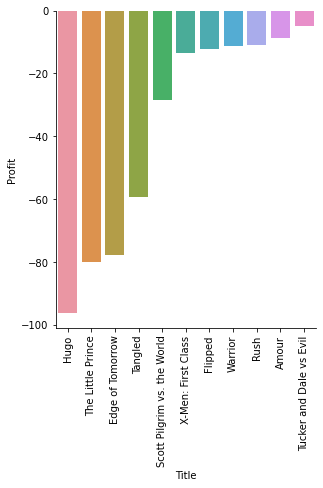

In [16]:
#now i am going to plot all those movie which earn -ve profit
ax=sns.catplot(x='Title',y='Profit',kind='bar',data=df3)
ax.set_xticklabels(rotation=90)

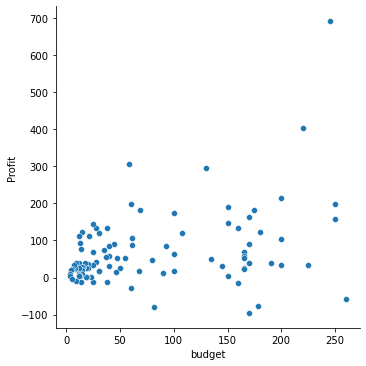

In [17]:
#now we want to see that is movies profit depends on movies budget
sns.relplot(x='budget',y='Profit',kind='scatter',data=movie)
#now we can clearly see that there is no direct relation bw movies budget nd profit 

In [18]:
movie['Total_faceboook_likes']=movie['actor_1_facebook_likes']+movie['actor_2_facebook_likes']+movie['actor_3_facebook_likes']
movie.sort_values(by='Total_faceboook_likes',ascending=False)



,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit,Total_faceboook_likes
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia,39.738905,138800.0
27,Inception,2010,160.0,292.568851,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,...,8.1,8.1,8.0,8.2,8.7,8.8,PG-13,USA,132.568851,79000.0
14,X-Men: Days of Future Past,2014,200.0,233.914986,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,...,7.7,7.7,7.9,7.4,8.1,7.9,PG-13,USA,33.914986,76000.0
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.6,7.6,7.6,7.1,7.9,7.8,R,USA,38.695371,74818.0
8,The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.130642,73000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,143.0
34,Gravity,2013,100.0,274.084951,Phaldut Sharma,Basher Savage,Amy Warren,39,23.0,13.0,...,7.7,7.7,7.5,7.5,7.9,7.8,PG-13,UK,174.084951,75.0
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA,121.101803,NaN
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53.546139,NaN


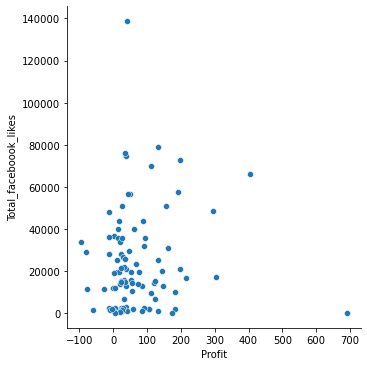

In [19]:
sns.relplot(x='Profit',y='Total_faceboook_likes',kind='scatter',data=movie)

In [21]:
#divide MetaCritic/10']
movie['MetaCritic']=movie['MetaCritic']/10


In [22]:
#creating a column in dataset called avg_rating
#avg_rating=imdb_rating+'MetaCritic_rating
movie['avg_rating']=(movie['MetaCritic']+movie['IMDb_rating'])/2
movie.loc[:,['Title','IMDb_rating','MetaCritic','avg_rating','Profit']]

,Title,IMDb_rating,MetaCritic,avg_rating,Profit
0,La La Land,8.2,9.3,8.75,121.101803
1,Zootopia,8.1,7.8,7.95,191.268248
2,Lion,8.1,6.9,7.50,39.738905
3,Arrival,8.0,8.1,8.05,53.546139
4,Manchester by the Sea,7.9,9.6,8.75,38.695371
...,...,...,...,...,...
95,Whiplash,8.5,8.8,8.65,9.792000
96,Before Midnight,7.9,9.4,8.65,5.114507
97,Star Wars: Episode VII - The Force Awakens,8.1,8.1,8.10,691.662225
98,Harry Potter and the Deathly Hallows: Part I,7.7,6.5,7.10,146.347721


In [23]:
df4=movie.sort_values(by='Profit',ascending=True)
df5=df4.loc[:,['Title','IMDb_rating','MetaCritic','avg_rating','Profit','content_rating']]
df5.head(11)

,Title,IMDb_rating,MetaCritic,avg_rating,Profit,content_rating
22,Hugo,7.5,8.3,7.90,-96.179906,PG
39,The Little Prince,7.8,7.0,7.40,-79.860848,PG
17,Edge of Tomorrow,7.9,7.1,7.50,-77.810499,PG-13
7,Tangled,7.8,7.1,7.45,-59.192738,PG
46,Scott Pilgrim vs. the World,7.5,6.9,7.20,-28.505730,PG-13
28,X-Men: First Class,7.8,6.5,7.15,-13.594629,PG-13
82,Flipped,7.7,NaN,NaN,-12.247786,PG
66,Warrior,8.2,7.1,7.65,-11.348338,PG-13
56,Rush,8.1,7.5,7.80,-11.096291,R
89,Amour,7.9,9.4,8.65,-8.674623,PG-13


In [24]:
df6=movie.sort_values(by='Profit',ascending=False)
df7=df6.loc[:,['Title','IMDb_rating','MetaCritic','avg_rating','Profit']]
df7.head(20)

,Title,IMDb_rating,MetaCritic,avg_rating,Profit
97,Star Wars: Episode VII - The Force Awakens,8.1,8.1,8.10,691.662225
11,The Avengers,8.1,6.9,7.50,403.279547
47,Deadpool,8.0,6.5,7.25,305.024263
32,The Hunger Games: Catching Fire,7.6,7.6,7.60,294.645577
12,Toy Story 3,8.3,9.2,8.75,214.984497
8,The Dark Knight Rises,8.4,7.8,8.10,198.130642
45,The Lego Movie,7.8,8.3,8.05,197.756197
1,Zootopia,8.1,7.8,7.95,191.268248
41,Despicable Me,7.7,7.2,7.45,182.501645
18,Inside Out,8.2,9.4,8.80,181.454367


In [25]:
df6[['Title','Country','Profit','content_rating']].head(20)



,Title,Country,Profit,content_rating
97,Star Wars: Episode VII - The Force Awakens,USA,691.662225,PG-13
11,The Avengers,USA,403.279547,PG-13
47,Deadpool,USA,305.024263,R
32,The Hunger Games: Catching Fire,USA,294.645577,PG-13
12,Toy Story 3,USA,214.984497,G
8,The Dark Knight Rises,USA,198.130642,PG-13
45,The Lego Movie,Australia,197.756197,PG
1,Zootopia,USA,191.268248,PG
41,Despicable Me,USA,182.501645,PG
18,Inside Out,USA,181.454367,PG


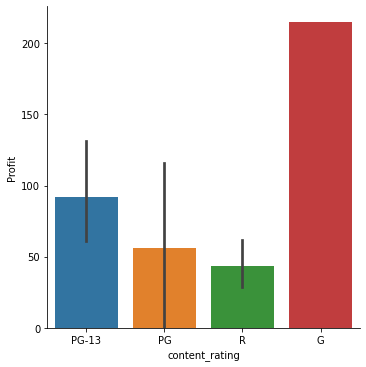

In [27]:
sns.catplot(x='content_rating',y='Profit',kind='bar',data=movie)

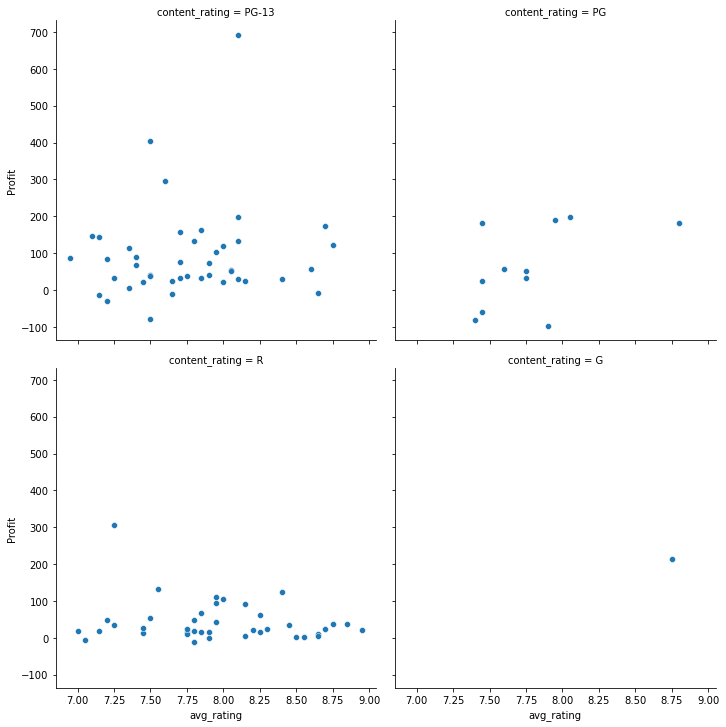

In [28]:
sns.relplot(x='avg_rating',y='Profit',kind='scatter',col='content_rating',data=movie,col_wrap=2)


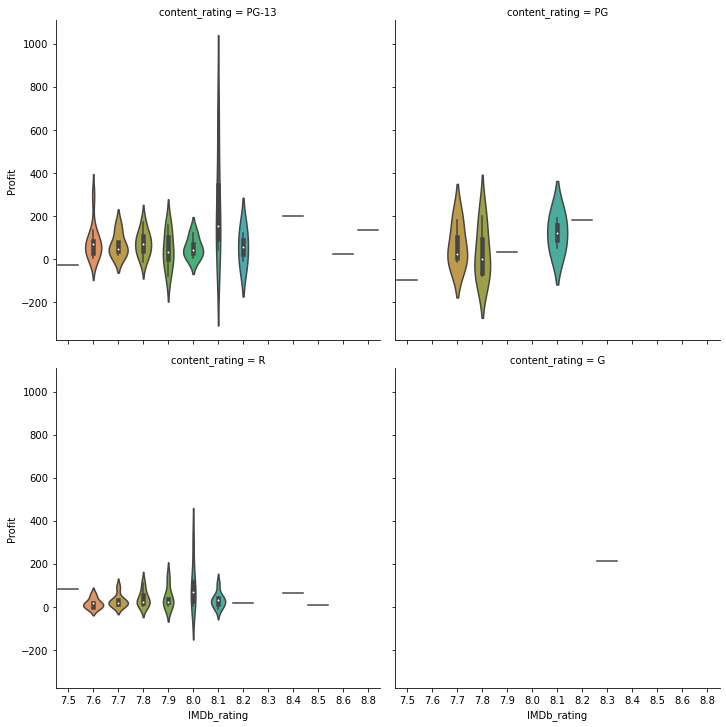

In [29]:
sns.catplot(x='IMDb_rating',y='Profit',kind='violin',col='content_rating',data=movie,col_wrap=2)

In [31]:
df=movie.loc[:,['Title','content_rating','CVotesU18M']]
df1=df[df['content_rating']=='R']
df1.sort_values(by='CVotesU18M',ascending=False).head(10)


,Title,content_rating,CVotesU18M
47,Deadpool,R,3601
36,The Wolf of Wall Street,R,2842
35,Django Unchained,R,2726
29,Mad Max: Fury Road,R,2682
95,Whiplash,R,2200
31,The Revenant,R,2141
40,Shutter Island,R,1811
43,Gone Girl,R,1598
72,Birdman or (The Unexpected Virtue of Ignorance),R,1538
65,The Grand Budapest Hotel,R,1537


In [32]:
df=movie.loc[:,['Title','content_rating','CVotesU18F']]
df1=df[df['content_rating']=='R']
df1.sort_values(by='CVotesU18F',ascending=False).head(10)


,Title,content_rating,CVotesU18F
47,Deadpool,R,969
36,The Wolf of Wall Street,R,757
43,Gone Girl,R,665
68,Silver Linings Playbook,R,660
95,Whiplash,R,660
65,The Grand Budapest Hotel,R,530
83,Black Swan,R,516
35,Django Unchained,R,501
40,Shutter Island,R,494
31,The Revenant,R,458


<AxesSubplot:xlabel='Runtime', ylabel='Count'>

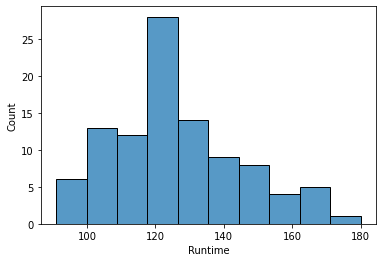

In [33]:
#run time analysis 
sns.histplot(x='Runtime',data=movie)

In [34]:
df_by_genre=movies.loc[:,"CVotes10":"VotesnUS"]
df_by_genre[["genre_1","genre_2","genre_3"]]=movies[["genre_1","genre_2","genre_3"]]
df_by_genre


,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,genre_1,genre_2,genre_3
97,155391,161810,166378,99402,40734,18060,8751,5970,4489,15768,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,Action,Adventure,Fantasy
11,260257,234203,264290,162604,67579,27957,12176,7201,4996,15528,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,Action,Sci-Fi,NaN
47,147467,147966,170810,105717,41811,15510,7046,4273,3037,8538,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,Action,Adventure,Comedy
32,85219,83874,150153,121748,50575,18571,7591,4094,2675,6978,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,Action,Adventure,Mystery
12,139773,149992,158704,88289,31291,11850,4859,2932,2119,6586,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,Animation,Adventure,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,47292,48976,79198,59689,28452,13451,6977,4254,3069,6287,...,7.2,7.1,7.1,7.0,6.6,7.8,7.4,Action,Comedy,Romance
7,56575,54688,97207,70947,26805,8530,3043,1396,805,1606,...,8.0,7.7,7.6,7.9,6.9,7.9,7.7,Animation,Adventure,Comedy
17,60383,99596,175961,100724,28982,8145,2858,1368,857,1661,...,7.7,7.8,7.8,7.8,7.5,8.0,7.8,Action,Adventure,Sci-Fi
39,7565,7321,11668,8558,3370,1162,456,227,158,293,...,7.9,7.5,7.4,7.9,6.6,7.7,7.7,Animation,Adventure,Drama


In [35]:
df_by_genre['cnt']=1
df_by_g1=df_by_genre.groupby("genre_1").aggregate(np.sum)
df_by_g2=df_by_genre.groupby("genre_2").aggregate(np.sum)
df_by_g3=df_by_genre.groupby("genre_3").aggregate(np.sum)


In [36]:
df_by_g1


,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre_1,,,,,,,,,,,,,,,,,,,,,
Action,2928407,3261919,4247693,2662020,986774,364234,156150,89483,61975,162426,...,209.1,208.8,210.0,206.5,206.0,209.0,197.2,215.8,209.5,27
Adventure,1058779,1179818,1560541,966275,365486,136985,58559,33174,22018,48100,...,92.7,92.6,93.5,92.0,91.6,93.8,88.9,95.3,93.5,12
Animation,681562,798227,1153214,722782,251076,83069,30718,15733,10026,25193,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11
Biography,666831,1088430,1654704,962977,306247,100005,38874,21536,15365,37469,...,100.8,100.7,101.3,100.5,100.0,102.9,94.7,103.3,101.5,13
Comedy,371217,496905,770395,518566,205434,81933,35788,20965,15286,33241,...,68.6,68.7,68.9,67.7,67.5,68.7,62.7,70.9,69.4,9
Crime,383290,690221,1083469,627593,206756,71460,30336,17190,11757,25839,...,69.4,69.7,68.8,68.7,68.6,69.6,66.3,71.9,70.1,9
Drama,1080725,1494053,1827363,1078966,417205,163874,75525,45846,32068,71464,...,139.3,139.0,139.7,137.7,137.2,138.7,130.0,143.2,141.1,18
Mystery,150405,230844,278844,132349,45167,15615,7061,3780,2662,4703,...,7.9,7.9,8.0,7.5,7.4,7.6,7.6,7.8,8.1,1


In [37]:
df_by_g2

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre_2,,,,,,,,,,,,,,,,,,,,,
Action,238060,285510,430062,260106,88580,29250,10820,5521,3598,8821,...,30.9,30.7,31.8,30.5,30.4,31.4,29.0,31.8,31.1,4
Adventure,2297820,2548864,3271725,2055600,758009,272735,113691,64623,44121,116937,...,171.0,170.4,173.9,169.2,168.4,172.8,162.7,176.4,171.6,22
Biography,185172,313178,576374,370003,119348,38643,14844,7974,5248,13828,...,38.3,38.2,38.5,38.0,37.9,38.8,35.4,39.4,38.4,5
Comedy,428995,624720,854162,512668,193916,76752,35193,20995,14798,30509,...,54.0,54.1,53.4,53.0,53.1,53.1,51.0,55.5,54.3,7
Crime,19576,40247,85359,64633,24920,8548,3261,1669,970,1689,...,7.5,7.6,7.2,7.6,7.6,7.4,7.2,7.8,7.6,1
Drama,1923492,2761237,4112363,2492241,853434,300100,124511,70205,49642,112896,...,270.2,270.4,270.1,267.9,267.1,271.8,253.4,278.2,272.6,35
Family,68937,54947,102488,80465,31205,11792,4808,2454,1617,4522,...,7.4,7.3,8.1,7.4,7.3,8.0,6.7,7.9,7.5,1
Fantasy,270616,290831,447307,291071,120920,47215,19848,10871,6885,14702,...,22.9,22.9,23.3,23.0,22.8,23.7,22.1,23.4,23.2,3
History,15757,32840,83322,63800,19183,5178,1657,735,419,878,...,7.5,7.5,7.5,7.7,7.6,7.9,7.4,7.7,7.5,1


In [38]:
df_by_g3

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre_3,,,,,,,,,,,,,,,,,,,,,
Adventure,238060,285510,430062,260106,88580,29250,10820,5521,3598,8821,...,30.9,30.7,31.8,30.5,30.4,31.4,29.0,31.8,31.1,4
Comedy,583404,653362,882294,559835,200937,68167,26488,14258,9307,24617,...,54.8,54.6,56.0,54.3,54.1,55.3,51.7,56.2,55.2,7
Crime,171660,236650,250667,129164,46715,18682,8674,5854,4258,9689,...,8.0,8.1,7.7,7.6,7.6,7.5,7.8,8.1,8.1,1
Drama,400221,680085,1167327,748493,258717,88338,35439,19075,12475,26948,...,91.8,91.7,92.0,91.2,91.0,92.7,86.1,94.5,92.3,12
Family,29228,40728,77893,62936,27932,11179,4664,2674,1700,3023,...,7.4,7.4,7.4,7.5,7.5,7.6,7.4,7.7,7.5,1
Fantasy,301836,311392,442460,308676,120911,46269,19555,11362,7808,24139,...,30.4,30.2,31.7,30.4,30.0,31.8,28.4,31.5,30.5,4
History,135504,227547,311209,159262,48678,16055,6307,3649,2729,8413,...,23.7,23.6,23.8,23.3,23.1,24.2,22.0,24.5,23.7,3
Music,74245,71191,64640,38831,17377,8044,3998,2839,2407,6802,...,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,1
Mystery,274446,443661,654167,375087,128131,44818,18755,10578,7149,17825,...,30.8,30.8,31.5,30.4,30.3,31.3,29.3,31.9,31.3,4


In [39]:
df_add=df_by_g1.add(df_by_g2,fill_value=0)
df_add=df_add.add(df_by_g3,fill_value=0)
df_add

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0
Crime,574526.0,967118.0,1419495.0,821390.0,278391.0,98690.0,42271.0,24713.0,16985.0,37217.0,...,84.9,85.4,83.7,83.9,83.8,84.5,81.3,87.8,85.8,11.0
Drama,3404438.0,4935375.0,7107053.0,4319700.0,1529356.0,552312.0,235475.0,135126.0,94185.0,211308.0,...,501.3,501.1,501.8,496.8,495.3,503.2,469.5,515.9,506.0,65.0
Family,98165.0,95675.0,180381.0,143401.0,59137.0,22971.0,9472.0,5128.0,3317.0,7545.0,...,14.8,14.7,15.5,14.9,14.8,15.6,14.1,15.6,15.0,2.0
Fantasy,572452.0,602223.0,889767.0,599747.0,241831.0,93484.0,39403.0,22233.0,14693.0,38841.0,...,53.3,53.1,55.0,53.4,52.8,55.5,50.5,54.9,53.7,7.0
History,151261.0,260387.0,394531.0,223062.0,67861.0,21233.0,7964.0,4384.0,3148.0,9291.0,...,31.2,31.1,31.3,31.0,30.7,32.1,29.4,32.2,31.2,4.0


In [67]:
#Extract genres with atleast 10 occurences
genre_top10=df_add[df_add['cnt']>10]
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0
Crime,574526.0,967118.0,1419495.0,821390.0,278391.0,98690.0,42271.0,24713.0,16985.0,37217.0,...,84.9,85.4,83.7,83.9,83.8,84.5,81.3,87.8,85.8,11.0
Drama,3404438.0,4935375.0,7107053.0,4319700.0,1529356.0,552312.0,235475.0,135126.0,94185.0,211308.0,...,501.3,501.1,501.8,496.8,495.3,503.2,469.5,515.9,506.0,65.0
Romance,549959.0,689492.0,1069280.0,712841.0,281289.0,110901.0,48913.0,27698.0,19200.0,40075.0,...,98.9,98.9,99.6,97.8,97.5,98.9,89.9,101.8,100.1,13.0
Sci-Fi,2325284.0,2530855.0,3002994.0,1802098.0,671811.0,254175.0,111925.0,65904.0,46171.0,114435.0,...,133.6,133.5,133.2,131.1,130.8,131.5,127.9,137.5,134.0,17.0
Thriller,1081701.0,1465491.0,1993378.0,1175799.0,416046.0,149953.0,65281.0,37940.0,25767.0,57630.0,...,100.6,100.7,100.1,99.6,99.3,100.7,96.2,103.1,101.5,13.0


In [68]:
#Take the mean for every column by dividing with cnt 
genre_top10.iloc[:,0:-1]=genre_top10.iloc[:,0:-1].divide(genre_top10["cnt"],axis=0)
genre_top10

/home/aditya/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-68-227e4fce97b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_top10.iloc[:,0:-1]=genre_top10.iloc[:,0:-1].divide(genre_top10["cnt"],axis=0)


,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144.096774,114433.193548,150895.322581,94262.129032,34688.838710,12693.032258,5386.129032,3064.645161,2115.258065,5524.096774,...,7.741935,7.725806,7.800000,7.645161,7.625806,7.754839,7.296774,7.987097,7.761290,31.0
Adventure,94596.289474,105636.631579,138482.315789,86367.921053,31896.710526,11551.842105,4817.631579,2718.894737,1835.184211,4575.210526,...,7.752632,7.728947,7.873684,7.676316,7.642105,7.842105,7.384211,7.986842,7.794737,38.0
Animation,61960.181818,72566.090909,104837.636364,65707.454545,22825.090909,7551.727273,2792.545455,1430.272727,911.454545,2290.272727,...,7.763636,7.718182,7.981818,7.681818,7.645455,7.881818,7.272727,7.963636,7.827273,11.0
Biography,47333.500000,77867.111111,123948.777778,74054.444444,23644.166667,7702.666667,2984.333333,1639.444444,1145.166667,2849.833333,...,7.727778,7.716667,7.766667,7.694444,7.661111,7.872222,7.227778,7.927778,7.772222,18.0
Comedy,60157.217391,77173.347826,108993.521739,69176.913043,26099.434783,9863.130435,4237.782609,2444.260870,1712.652174,3842.043478,...,7.713043,7.713043,7.752174,7.608696,7.595652,7.700000,7.191304,7.939130,7.778261,23.0
Crime,52229.636364,87919.818182,129045.000000,74671.818182,25308.272727,8971.818182,3842.818182,2246.636364,1544.090909,3383.363636,...,7.718182,7.763636,7.609091,7.627273,7.618182,7.681818,7.390909,7.981818,7.800000,11.0
Drama,52375.969231,75928.846154,109339.276923,66456.923077,23528.553846,8497.107692,3622.692308,2078.861538,1449.000000,3250.892308,...,7.712308,7.709231,7.720000,7.643077,7.620000,7.741538,7.223077,7.936923,7.784615,65.0
Romance,42304.538462,53037.846154,82252.307692,54833.923077,21637.615385,8530.846154,3762.538462,2130.615385,1476.923077,3082.692308,...,7.607692,7.607692,7.661538,7.523077,7.500000,7.607692,6.915385,7.830769,7.700000,13.0
Sci-Fi,136781.411765,148873.823529,176646.705882,106005.764706,39518.294118,14951.470588,6583.823529,3876.705882,2715.941176,6731.470588,...,7.858824,7.852941,7.835294,7.711765,7.694118,7.735294,7.523529,8.088235,7.882353,17.0
Thriller,83207.769231,112730.076923,153336.769231,90446.076923,32003.538462,11534.846154,5021.615385,2918.461538,1982.076923,4433.076923,...,7.738462,7.746154,7.700000,7.661538,7.638462,7.746154,7.400000,7.930769,7.807692,13.0


In [56]:
# Converting only CVotes to int type
genre_top10[genre_top10.loc[:,"CVotes10":"CVotesnUS"].columns]=genre_top10[genre_top10.loc[:,"CVotes10":"CVotesnUS"].columns].astype(int)

In [57]:
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,...,8.000000,7.741935,7.725806,7.800000,7.645161,7.625806,7.754839,7.296774,7.987097,7.761290
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,...,8.086842,7.752632,7.728947,7.873684,7.676316,7.642105,7.842105,7.384211,7.986842,7.794737
Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,...,8.200000,7.763636,7.718182,7.981818,7.681818,7.645455,7.881818,7.272727,7.963636,7.827273
Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,...,7.933333,7.727778,7.716667,7.766667,7.694444,7.661111,7.872222,7.227778,7.927778,7.772222
Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,...,7.947826,7.713043,7.713043,7.752174,7.608696,7.595652,7.700000,7.191304,7.939130,7.778261
Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,3383,...,7.763636,7.718182,7.763636,7.609091,7.627273,7.618182,7.681818,7.390909,7.981818,7.800000
Drama,52375,75928,109339,66456,23528,8497,3622,2078,1449,3250,...,7.920000,7.712308,7.709231,7.720000,7.643077,7.620000,7.741538,7.223077,7.936923,7.784615
Romance,42304,53037,82252,54833,21637,8530,3762,2130,1476,3082,...,7.907692,7.607692,7.607692,7.661538,7.523077,7.500000,7.607692,6.915385,7.830769,7.700000
Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,6731,...,8.041176,7.858824,7.852941,7.835294,7.711765,7.694118,7.735294,7.523529,8.088235,7.882353
Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,4433,...,7.876923,7.738462,7.746154,7.700000,7.661538,7.638462,7.746154,7.400000,7.930769,7.807692


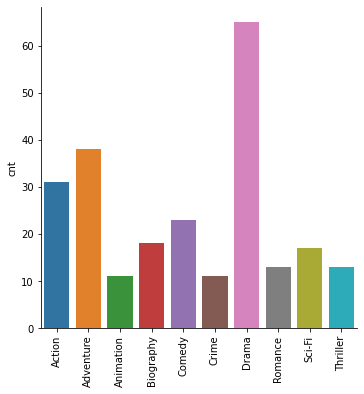

In [77]:
#Now let's derive some insights from this data frame. 
#Make a bar chart plotting different genres vs cnt using seaborn
ax=sns.catplot(y=genre_top10['cnt'],x=genre_top10.index,kind='bar',data=genre_top10)
ax.set_xticklabels(rotation=90)

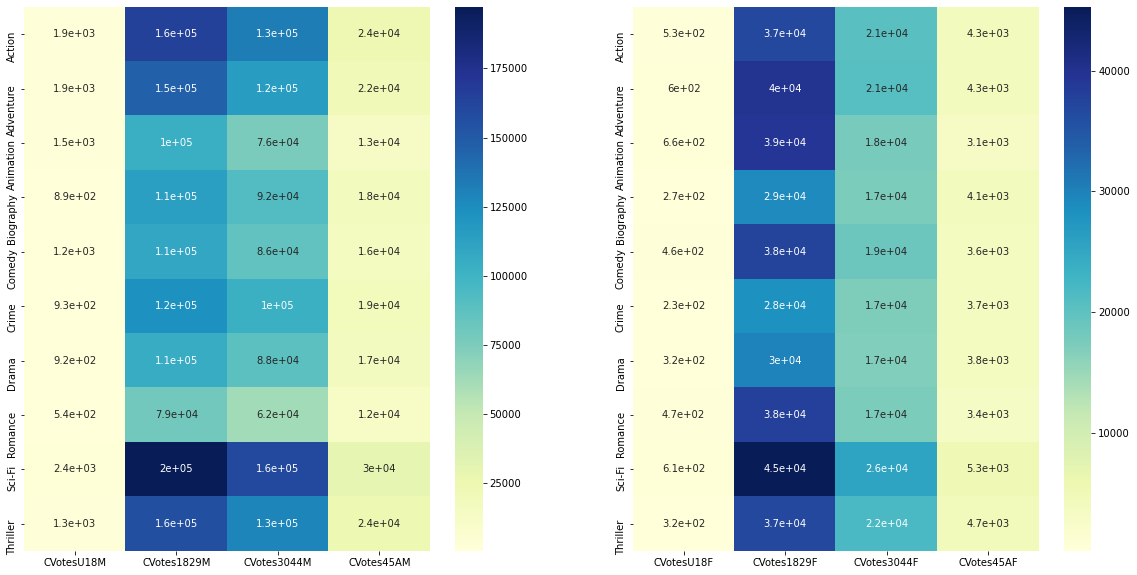

In [79]:
# 1st set of heat maps for CVotes-related columns
# Males
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ax=sns.heatmap(genre_top10[["CVotesU18M","CVotes1829M","CVotes3044M","CVotes45AM"]],annot=True,cmap="YlGnBu")
#Females
plt.subplot(1,2,2)
ax=sns.heatmap(genre_top10[["CVotesU18F","CVotes1829F","CVotes3044F","CVotes45AF"]],annot=True,cmap="YlGnBu")
plt.show()

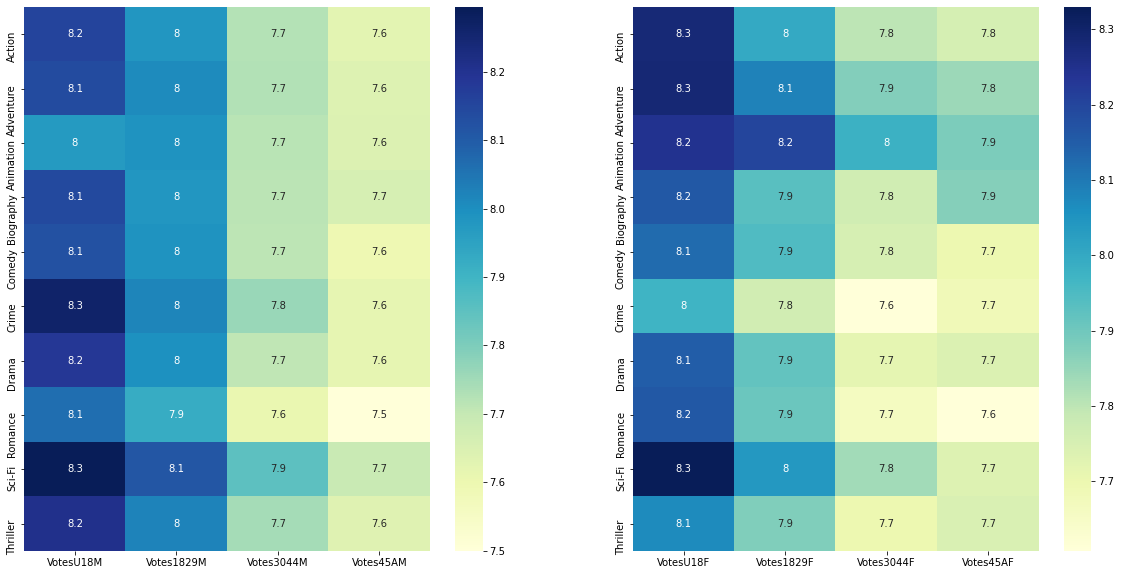

In [81]:
# 2nd set of heat maps for Votes-related columns
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ax=sns.heatmap(genre_top10[["VotesU18M","Votes1829M","Votes3044M","Votes45AM"]],annot=True,cmap="YlGnBu")
#Females
plt.subplot(1,2,2)
ax=sns.heatmap(genre_top10[["VotesU18F","Votes1829F","Votes3044F","Votes45AF"]],annot=True,cmap="YlGnBu")
plt.show()